<a href="https://colab.research.google.com/github/89CANDY89/BOOTCAMP-2-ALURA/blob/main/MODULO%202/Aula6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula 06

#Importar Bibliotecas

In [100]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Carregar informações

In [110]:
dados = pd.read_csv("https://raw.githubusercontent.com/89CANDY89/BOOTCAMP-2-ALURA/main/dados/DOSES%20POR%20ESTADO.csv", encoding="ISO-8859-1",
                    skiprows = 0, sep=";", skipfooter = 1, thousands = ".", decimal = "," , engine = "python")

# Modificando o modo de leitura dos valores totais dos gastos.
pd.options.display.float_format = "{:.2f}".format

dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Dez,2021/TOTALE
0,11 Rondônia,178932,95359,73193,163535,86012,235824,93365,785330,90069,68268,60769,63348,71386,61200,78320,175826,102095,235537,78821,83649,231824,73700,71377,60858,62624,58800,79042,169658,91309,225175,78529,227038,69962,70735,77844,74815,78515,81401,83531,...,87536,77652,138877,134188,79137,77014,68930,58752,82237,71341,71163,86015,88568,74321,80200,83566,91380,104087,79399,53573,80264,89835,78114,56546,74602,78199,79135,80150,72766,103357,85260,52404,51759,51206,61364,63157,66912,13598,0,16142380
1,12 Acre,75967,47823,42638,83750,55741,162863,46589,392150,74149,41209,42827,35839,39852,43449,46723,98756,61884,161981,51180,50755,161613,45577,45782,42972,35054,38491,49855,91068,54318,146752,38928,143586,37490,36786,42920,45089,52875,54573,63567,...,39340,33138,39502,72646,34714,37836,32721,26697,40682,37351,36522,41670,40283,37626,41300,38967,37878,45440,41413,30822,44542,39371,34534,21410,29684,25823,33836,29468,32871,44162,32184,24494,28182,21841,26625,28942,21795,1253,0,8309265
2,13 Amazonas,362598,223540,195949,382469,241685,613409,209090,1709946,223520,180388,174280,164874,166252,176474,192866,395718,270893,603714,222510,236356,586026,188910,194757,168389,166464,161654,213715,377209,228355,558016,169788,573615,187582,171534,188006,173725,196916,205619,200936,...,284171,234577,581957,556559,279503,257870,205095,171852,256039,229700,288559,283221,247671,208097,227808,244090,230625,252749,208671,158480,263917,228216,217479,63587,165542,223678,205119,223963,197850,273945,191785,156783,124813,148059,190915,188482,189358,26876,0,41904247
3,14 Roraima,60897,54141,38518,47611,41415,98733,37541,100206,152362,25861,22799,22486,26308,30326,30197,52883,45781,89725,33493,34455,84498,31529,27477,23331,28580,24336,27300,51808,34476,78697,28642,79031,33134,29123,26266,25654,28289,31316,30902,...,72922,52105,61893,59952,39823,65675,63046,56998,72926,55377,53817,52092,61621,33496,39703,47430,48341,70431,51731,45694,58562,50014,42947,22287,24747,27616,54192,30122,31332,39993,28229,26090,32711,29344,35267,36317,14482,3993,0,6958218
4,15 Pará,539062,410146,348803,772385,385744,1449405,354966,1314394,2793457,295497,365440,291755,338173,354901,366351,854416,389357,1251442,368883,362098,1358423,398248,357114,309434,283981,298224,345633,752225,328776,1128337,340574,1183000,332758,293336,314787,295445,298736,338980,352575,...,279049,259024,335140,476956,303202,308859,285931,216711,356131,327355,324522,336084,334859,299320,330618,360301,380274,500042,367945,248664,398677,417918,392098,191441,214887,306008,409831,406232,390566,415484,313079,199509,252327,229159,266990,250709,201067,29036,0,68090618
5,16 Amapá,74862,50568,42231,67252,39239,120126,33961,310791,37957,30558,27774,24093,33958,27994,39865,68938,44650,126216,33888,29865,139834,32109,33492,24388,30336,27786,38187,61051,39200,119081,28707,110083,40434,32233,37768,25012,36346,37710,36177,...,33486,30815,37164,70064,37582,40057,34560,27652,44310,37951,37158,36998,38210,32694,35682,41384,36309,43542,34882,26130,38336,37776,30727,9218,10792,18998,30651,28166,30374,43506,16039,23791,44033,55502,24925,31692,24919,2391,0,7149283
6,17 Tocantins,306930,122303,92080,169657,77744,221654,59464,678215,76852,61627,58004,54374,68282,58923,72170,168620,75985,214300,62252,76220,207

#Tratar Dados

In [39]:
pd.options.display.float_format = "{:.2f}".format


In [111]:
colunas_usaveis_def3 = dados.mean().index.tolist()
colunas_usaveis_def3.insert(0,"Unidade da Federação")

In [112]:
usaveis_def3 = dados[colunas_usaveis_def3]
usaveis_def3 = usaveis_def3.set_index("Unidade da Federação")

usaveis_def3.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Dez,2021/TOTALE
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,178932,95359,73193,163535,86012,235824,93365,785330,90069,68268,60769,63348,71386,61200,78320,175826,102095,235537,78821,83649,231824,73700,71377,60858,62624,58800,79042,169658,91309,225175,78529,227038,69962,70735,77844,74815,78515,81401,83531,88499,...,87536,77652,138877,134188,79137,77014,68930,58752,82237,71341,71163,86015,88568,74321,80200,83566,91380,104087,79399,53573,80264,89835,78114,56546,74602,78199,79135,80150,72766,103357,85260,52404,51759,51206,61364,63157,66912,13598,0,16142380
12 Acre,75967,47823,42638,83750,55741,162863,46589,392150,74149,41209,42827,35839,39852,43449,46723,98756,61884,161981,51180,50755,161613,45577,45782,42972,35054,38491,49855,91068,54318,146752,38928,143586,37490,36786,42920,45089,52875,54573,63567,60827,...,39340,33138,39502,72646,34714,37836,32721,26697,40682,37351,36522,41670,40283,37626,41300,38967,37878,45440,41413,30822,44542,39371,34534,21410,29684,25823,33836,29468,32871,44162,32184,24494,28182,21841,26625,28942,21795,1253,0,8309265
13 Amazonas,362598,223540,195949,382469,241685,613409,209090,1709946,223520,180388,174280,164874,166252,176474,192866,395718,270893,603714,222510,236356,586026,188910,194757,168389,166464,161654,213715,377209,228355,558016,169788,573615,187582,171534,188006,173725,196916,205619,200936,224945,...,284171,234577,581957,556559,279503,257870,205095,171852,256039,229700,288559,283221,247671,208097,227808,244090,230625,252749,208671,158480,263917,228216,217479,63587,165542,223678,205119,223963,197850,273945,191785,156783,124813,148059,190915,188482,189358,26876,0,41904247
14 Roraima,60897,54141,38518,47611,41415,98733,37541,100206,152362,25861,22799,22486,26308,30326,30197,52883,45781,89725,33493,34455,84498,31529,27477,23331,28580,24336,27300,51808,34476,78697,28642,79031,33134,29123,26266,25654,28289,31316,30902,34412,...,72922,52105,61893,59952,39823,65675,63046,56998,72926,55377,53817,52092,61621,33496,39703,47430,48341,70431,51731,45694,58562,50014,42947,22287,24747,27616,54192,30122,31332,39993,28229,26090,32711,29344,35267,36317,14482,3993,0,6958218
15 Pará,539062,410146,348803,772385,385744,1449405,354966,1314394,2793457,295497,365440,291755,338173,354901,366351,854416,389357,1251442,368883,362098,1358423,398248,357114,309434,283981,298224,345633,752225,328776,1128337,340574,1183000,332758,293336,314787,295445,298736,338980,352575,406099,...,279049,259024,335140,476956,303202,308859,285931,216711,356131,327355,324522,336084,334859,299320,330618,360301,380274,500042,367945,248664,398677,417918,392098,191441,214887,306008,409831,406232,390566,415484,313079,199509,252327,229159,266990,250709,201067,29036,0,68090618


In [104]:
# Separando o Id e renomeando o index só com os estados
id_uf = usaveis_def3.index.str.slice(stop=2)
usaveis_def3.index = usaveis_def3.index.str.slice(start=3)

In [113]:
usaveis_def3.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [114]:
usaveis_def3= usaveis_def3.drop("2021/TOTALE", axis=1)
usaveis_ordenado = usaveis_def3.sort_values(by="Unidade da Federação", ascending=False)
usaveis_ordenado.index = usaveis_ordenado.index.str[3:]
usaveis_ordenado = usaveis_ordenado[usaveis_ordenado.columns[6:]]
usaveis_ordenado = usaveis_ordenado
usaveis_ordenado.head()

,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Out,2011/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Distrito Federal,113787,1200574,130875,107954,97071,92967,115291,94120,124558,298881,142516,324659,119879,109240,316655,102438,100355,101643,108194,92680,129028,290773,135655,332252,122086,328128,128229,113382,112268,130133,134085,118957,115800,121743,161966,128591,133692,155643,132309,119304,...,119710,114728,113530,134116,199768,115590,120011,101797,91190,131040,105523,114111,116994,140270,105828,126629,186593,136782,141714,106345,93995,149629,149376,124729,87404,136282,120248,112715,152619,120341,162030,120903,86169,106107,83218,104881,105647,122256,25068,0
Goiás,293709,1594276,842252,340664,320188,420456,230234,217624,239180,733734,273416,762935,258878,237496,722056,220065,221790,192228,223051,205622,243781,710761,270431,742506,272260,761153,231719,235511,276681,254168,304291,276826,267753,279454,310837,332621,281547,389017,292975,278702,...,278204,247057,225768,275630,396437,236918,259244,239015,177173,282321,224380,271061,290296,285416,207976,257184,291158,282268,282258,240472,135510,273800,264663,229446,174114,307737,251861,270901,255436,246964,457753,268821,163308,193679,169783,204936,257003,162366,23412,0
Mato Grosso,178667,1917717,220199,140363,117132,112904,118145,127045,130596,327752,163528,410036,172975,133280,393470,143139,122790,117895,90730,109941,109971,332406,157787,415139,147365,406574,147602,122556,128609,128808,119432,133336,136401,153236,172595,170721,170931,177376,147713,145149,...,163320,165790,146257,171267,274738,148904,169187,147517,119937,171185,134883,147572,173925,182518,139892,165137,175876,165657,198231,168138,110847,185024,205771,148512,112303,169314,149123,168303,157033,147951,253102,170452,108903,139672,118314,132586,136317,131813,17996,0
Mato Grosso do Sul,106923,851361,432341,101989,96712,74086,113427,92079,112963,311878,168367,373798,114543,104958,332099,97214,102290,77925,100242,83234,120143,319574,147591,339706,110114,334063,101361,106499,118289,96288,137292,122861,126537,135232,157199,156938,142648,172728,130018,133412,...,128756,141505,127067,144557,240183,153269,139418,126306,92908,145287,120782,128522,146822,154124,122369,153013,153269,164181,164140,135364,103477,121780,130425,104080,82466,125843,127466,138667,124923,112975,169843,124720,78830,96925,82751,90663,104903,75551,13606,0
Rio Grande do Sul,294184,2455944,1274657,540508,343534,917295,940767,607787,479033,2391558,1538289,1350963,366274,302535,1016735,297041,300223,295500,271015,258689,308719,1371720,332200,1015727,305134,1009148,282288,310131,342119,351874,356969,363906,371554,382832,444672,638554,557882,492630,362806,352006,...,385514,356740,349803,440469,591486,330354,394171,358794,279979,398592,349745,365809,446235,422462,358681,436266,433914,377091,493289,422994,284444,430597,573647,387594,272662,382401,389326,439277,387649,336727,595661,423386,272344,297255,255041,294923,336132,206074,30593,0


In [130]:
mensal = usaveis_ordenado.T
mensal = mensal / 10000
mensal.head()

Unidade da Federação,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Rio Grande do Sul,Santa Catarina,Paraná,São Paulo,Rio de Janeiro,Espírito Santo,Minas Gerais,Bahia,Sergipe,Alagoas,Pernambuco,Paraíba,Rio Grande do Norte,Ceará,Piauí,Maranhão,Tocantins,Amapá,Pará,Roraima,Amazonas,Acre,Rondônia
2008/Jul,11.38,29.37,17.87,10.69,29.42,21.80,31.89,175.25,43.69,12.45,59.78,50.92,7.38,9.04,30.44,12.83,9.22,28.92,11.07,31.43,5.95,3.40,35.50,3.75,20.91,4.66,9.34
2008/Ago,120.06,159.43,191.77,85.14,245.59,260.99,448.61,1794.94,546.44,158.66,807.88,666.09,95.40,125.26,399.45,105.51,180.76,391.62,123.78,412.84,67.82,31.08,131.44,10.02,170.99,39.22,78.53
2008/Set,13.09,84.23,22.02,43.23,127.47,18.39,38.47,157.00,230.58,12.63,131.27,71.82,7.20,27.21,31.16,17.77,8.70,42.41,17.05,57.10,7.69,3.80,279.35,15.24,22.35,7.41,9.01
2008/Out,10.80,34.07,14.04,10.20,54.05,17.07,32.34,132.75,118.98,11.19,67.29,52.32,6.72,10.77,28.47,18.86,8.57,22.90,10.72,30.45,6.16,3.06,29.55,2.59,18.04,4.12,6.83
2008/Nov,9.71,32.02,11.71,9.67,34.35,17.08,31.37,126.23,76.54,10.70,66.22,47.11,6.97,10.32,28.88,18.78,9.00,24.92,13.62,32.10,5.80,2.78,36.54,2.28,17.43,4.28,6.08


In [134]:
from datetime import datetime
from datetime import date

In [135]:
meses = {"Jan":1,
         "Fev":2,
         "Mar":3,
         "Abr":4,
         "Mai":5,
         "Jun":6,
         "Jul":7,
         "Ago":8,
         "Set":9,
         "Out":10,
         "Nov":11,
         "Dez":12}

def para_data(ano_mes):
  ano = int(ano_mes[0:4])
  mes = ano_mes[5:8]
  mes = int(meses[mes])
  return date(ano, mes, 1)

mensal.index = mensal.index.map(para_data)

In [136]:
mensal.head()

Unidade da Federação,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Rio Grande do Sul,Santa Catarina,Paraná,São Paulo,Rio de Janeiro,Espírito Santo,Minas Gerais,Bahia,Sergipe,Alagoas,Pernambuco,Paraíba,Rio Grande do Norte,Ceará,Piauí,Maranhão,Tocantins,Amapá,Pará,Roraima,Amazonas,Acre,Rondônia
2008-07-01,11.38,29.37,17.87,10.69,29.42,21.80,31.89,175.25,43.69,12.45,59.78,50.92,7.38,9.04,30.44,12.83,9.22,28.92,11.07,31.43,5.95,3.40,35.50,3.75,20.91,4.66,9.34
2008-08-01,120.06,159.43,191.77,85.14,245.59,260.99,448.61,1794.94,546.44,158.66,807.88,666.09,95.40,125.26,399.45,105.51,180.76,391.62,123.78,412.84,67.82,31.08,131.44,10.02,170.99,39.22,78.53
2008-09-01,13.09,84.23,22.02,43.23,127.47,18.39,38.47,157.00,230.58,12.63,131.27,71.82,7.20,27.21,31.16,17.77,8.70,42.41,17.05,57.10,7.69,3.80,279.35,15.24,22.35,7.41,9.01
2008-10-01,10.80,34.07,14.04,10.20,54.05,17.07,32.34,132.75,118.98,11.19,67.29,52.32,6.72,10.77,28.47,18.86,8.57,22.90,10.72,30.45,6.16,3.06,29.55,2.59,18.04,4.12,6.83
2008-11-01,9.71,32.02,11.71,9.67,34.35,17.08,31.37,126.23,76.54,10.70,66.22,47.11,6.97,10.32,28.88,18.78,9.00,24.92,13.62,32.10,5.80,2.78,36.54,2.28,17.43,4.28,6.08


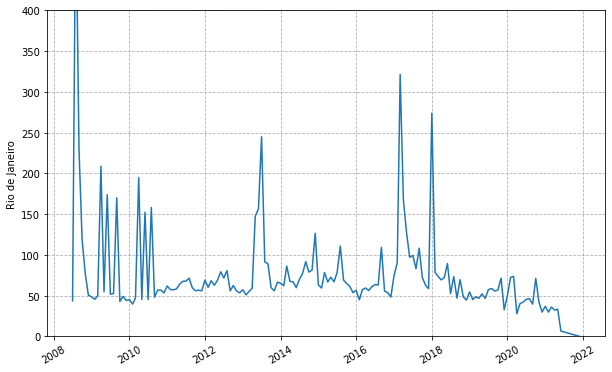

In [137]:
plt.figure(figsize = (10,6))
ax = sns.lineplot(data = mensal, x=mensal.index, y="Rio de Janeiro")
plt.xticks(rotation=30)
#comentando a linha abaixo percebe que o plota o gráfico por ano
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11))
plt.grid(True, linestyle='--')
plt.ylim(0,400)
# colocar como o método achar melhor a representação do eixo x
#ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.show()

In [138]:
#utilizando o melt para transformar cada coluna em uma linha
mensal_aberto = mensal.reset_index().melt(id_vars=["index"])
mensal_aberto.columns = ["dia_mes_ano","uf","gastos"]
mensal_aberto.head()

,dia_mes_ano,uf,gastos
0,2008-07-01,Distrito Federal,11.38
1,2008-08-01,Distrito Federal,120.06
2,2008-09-01,Distrito Federal,13.09
3,2008-10-01,Distrito Federal,10.80
4,2008-11-01,Distrito Federal,9.71


In [139]:
dias_mes = {1:31,
            2:28,
            3:31,
            4:30,
            5:31,
            6:30,
            7:31,
            8:31,
            9:30,
            10:31,
            11:30,
            12:31}

meses_extenso = {1:"Janeiro",
                  2:"Fevereiro",
                  3:"Março",
                  4:"Abril",
                  5:"Maio",
                  6:"Junho",
                  7:"Julho",
                  8:"Agosto",
                  9:"Setembro",
                  10:"Outubro",
                  11:"Novembro",
                  12:"Dezembro"}
mensal_aberto["dia_mes_ano"] = mensal_aberto["dia_mes_ano"].astype("datetime64")
mensal_aberto["mes"] = mensal_aberto["dia_mes_ano"].dt.month
mensal_aberto["ano"] = mensal_aberto["dia_mes_ano"].dt.year
mensal_aberto["mes_extenso"] = mensal_aberto["mes"].map(meses_extenso)
mensal_aberto["mes_extenso"] = mensal_aberto["mes_extenso"].astype(str)
mensal_aberto["gasto_dia"] = mensal_aberto["gastos"] / mensal_aberto["mes"].map(dias_mes)
mensal_aberto.head()

,dia_mes_ano,uf,gastos,mes,ano,mes_extenso,gasto_dia
0,2008-07-01,Distrito Federal,11.38,7,2008,Julho,0.37
1,2008-08-01,Distrito Federal,120.06,8,2008,Agosto,3.87
2,2008-09-01,Distrito Federal,13.09,9,2008,Setembro,0.44
3,2008-10-01,Distrito Federal,10.80,10,2008,Outubro,0.35
4,2008-11-01,Distrito Federal,9.71,11,2008,Novembro,0.32


In [148]:
estado_analisar = mensal_aberto.query("uf=='Rio de Janeiro'")
estado_analisar.head()

,dia_mes_ano,uf,gastos,mes,ano,mes_extenso,gasto_dia
1256,2008-07-01,Rio de Janeiro,43.69,7,2008,Julho,1.41
1257,2008-08-01,Rio de Janeiro,546.44,8,2008,Agosto,17.63
1258,2008-09-01,Rio de Janeiro,230.58,9,2008,Setembro,7.69
1259,2008-10-01,Rio de Janeiro,118.98,10,2008,Outubro,3.84
1260,2008-11-01,Rio de Janeiro,76.54,11,2008,Novembro,2.55


In [149]:
gastos_por_ano_estado = estado_analisar.groupby("ano").sum()
gastos_por_ano_estado.head()

,gastos,mes,gasto_dia
ano,,,
2008,1066.86,57,34.74
2009,992.55,78,32.82
2010,943.08,78,31.05
2011,734.25,78,24.15
2012,788.92,78,25.93


#Desafio 01: Reordenar as cores pelo valor do eixo y.

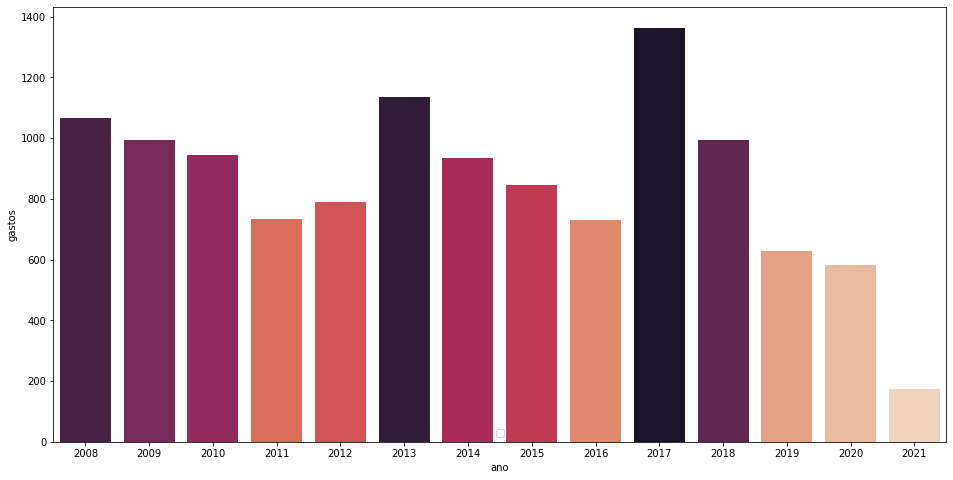

In [150]:
plt.figure(figsize=(16,8))
ax = sns.barplot(data=gastos_por_ano_estado, x=gastos_por_ano_estado.index, y="gastos", hue="gastos", dodge = False, palette= sns.color_palette("rocket_r",14))
ax.legend('')

#Desafio 02: Explorar a documentação do Seaborn.

#Desafio 03: Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

<Figure size 1152x576 with 0 Axes>

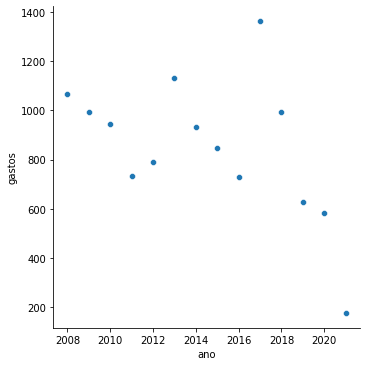

In [151]:
#replot
plt.figure(figsize=(16,8))
ax = sns.relplot(data=gastos_por_ano_estado, x=gastos_por_ano_estado.index, y="gastos")


<Figure size 1152x576 with 0 Axes>

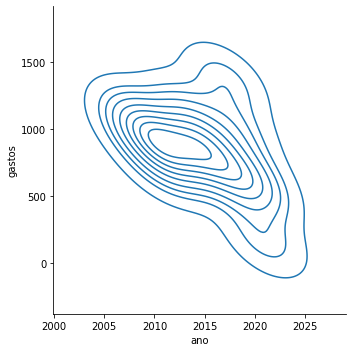

In [152]:
#displot kde
plt.figure(figsize=(16,8))
ax = sns.displot(data=gastos_por_ano_estado, x=gastos_por_ano_estado.index, y="gastos", kind="kde")

<Figure size 1152x576 with 0 Axes>

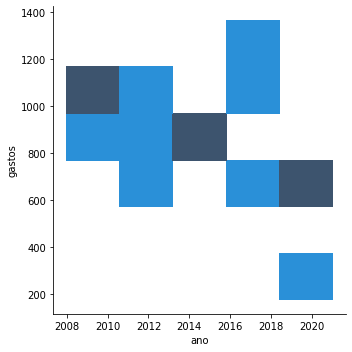

In [153]:
#displot hist
plt.figure(figsize=(16,8))
ax = sns.displot(data=gastos_por_ano_estado, x=gastos_por_ano_estado.index, y="gastos", kind="hist")

<Figure size 1152x576 with 0 Axes>

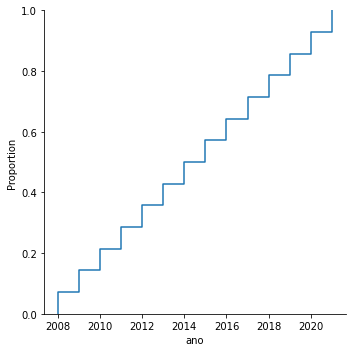

In [154]:
#displot ecdf
plt.figure(figsize=(16,8))
ax = sns.displot(data=gastos_por_ano_estado, x=gastos_por_ano_estado.index, kind="ecdf")

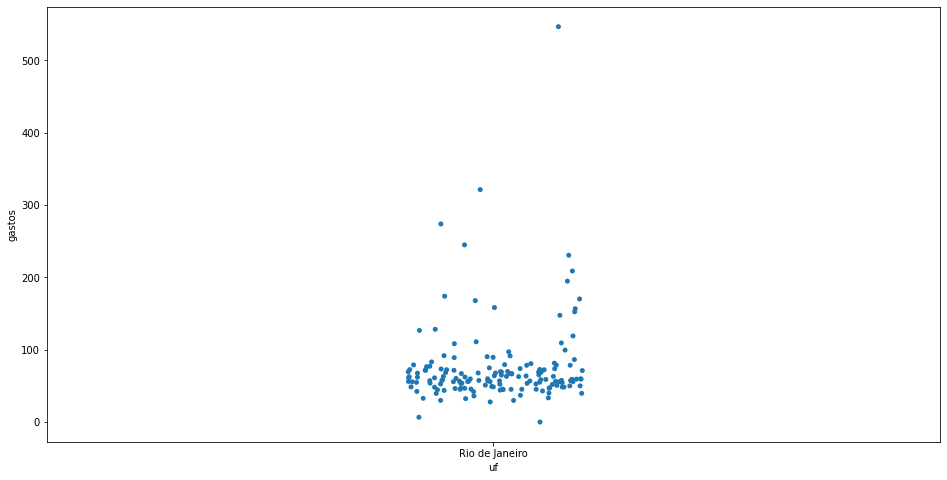

In [155]:
#displot ecdf
plt.figure(figsize=(16,8))
ax = sns.stripplot(data=estado_analisar, x="uf", y="gastos")

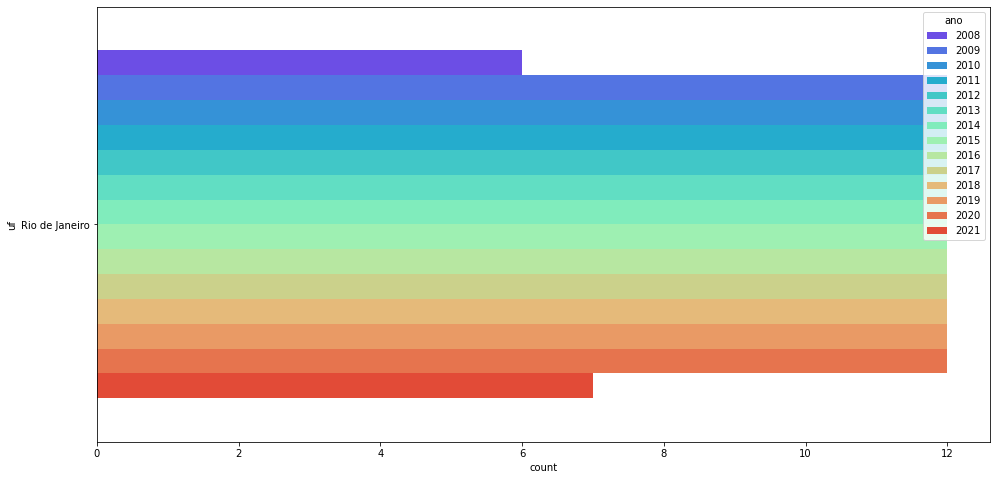

In [156]:
#displot ecdf
plt.figure(figsize=(16,8))
ax = sns.countplot(data=estado_analisar, y="uf", hue="ano", palette= sns.color_palette("rainbow",14))

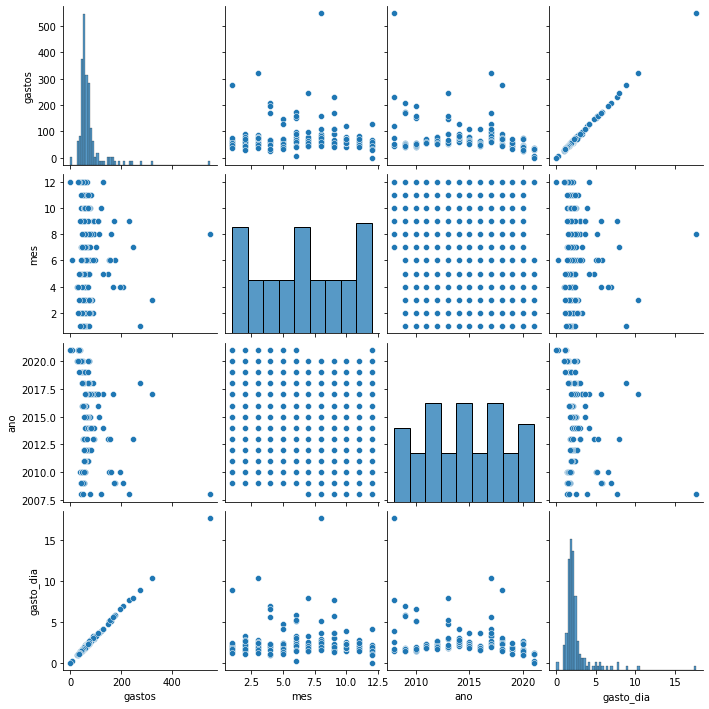

In [157]:
sns.pairplot(estado_analisar)